In [102]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [103]:
dna_data = pd.read_csv("Cleaned_Date_DNA_Data.csv")
culture_data = pd.read_csv("Cleaned_Date_culture_Data.csv")

In [104]:
culture_data.head()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time
0,2231,113666.0,2016-08-04 08:30:00,Humboldt,1.0,1.0,1.0,41.90643,-87.703717,2016-08-04,08:30:00
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.71420,-87.529900,2016-06-01,07:15:00
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.71420,-87.529900,2016-06-01,08:00:00
3,4980,109008.0,2013-05-26 00:00:00,57th Street,17.0,20.0,18.4,41.79110,-87.579700,2013-05-26,00:00:00
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.01310,-87.663500,2015-07-07,00:00:00


In [105]:
test = "2016-08-04"

formatted = datetime.datetime.strptime(test, "%Y-%m-%d")

In [106]:
formatted.month

8

In [107]:
dna_data["Sample Month"] = ""

for index, row in dna_data.iterrows():
    
    date = row["Sample Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    dna_data.loc[index, "Sample Month"] = formatted.month
    
# using striptime: https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python/26105888


In [108]:
culture_data["Sample Month"] = ""

for index, row in culture_data.iterrows():
    
    date = row["Sample Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    culture_data.loc[index, "Sample Month"] = formatted.month

In [109]:
culture_data.head()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Sample Month
0,2231,113666.0,2016-08-04 08:30:00,Humboldt,1.0,1.0,1.0,41.90643,-87.703717,2016-08-04,08:30:00,8
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.71420,-87.529900,2016-06-01,07:15:00,6
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.71420,-87.529900,2016-06-01,08:00:00,6
3,4980,109008.0,2013-05-26 00:00:00,57th Street,17.0,20.0,18.4,41.79110,-87.579700,2013-05-26,00:00:00,5
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.01310,-87.663500,2015-07-07,00:00:00,7


In [110]:
dna_by_month = dna_data.groupby("Sample Month")
culture_by_month = culture_data.groupby("Sample Month")

In [111]:
dna_y_axis = dna_by_month["DNA Reading Mean"].mean()
dna_y_axis

Sample Month
5    294.675561
6    491.519486
7    627.044898
8    606.399228
9    441.428708
Name: DNA Reading Mean, dtype: float64

In [112]:
x_axis = ["May", "June", "July", "August", "September"]

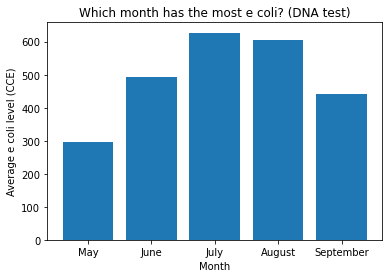

In [119]:
plt.bar(x_axis, dna_y_axis)

plt.title("Which month has the most e coli? (DNA test)")
plt.xlabel("Month")
plt.ylabel("Average e coli level (CCE)")

plt.savefig("monthly e coli.png")

plt.show()

In [114]:
culture_y_axis = culture_by_month["Culture Reading Mean"].mean()
culture_y_axis

Sample Month
5     162.750043
6     131.254973
7     163.658208
8     160.541246
9     147.932780
10      1.000000
Name: Culture Reading Mean, dtype: float64

In [115]:
#dropping october
culture_y_axis=culture_y_axis.drop(labels=10)

In [116]:
x_axis = ["May", "June", "July", "August", "September"]

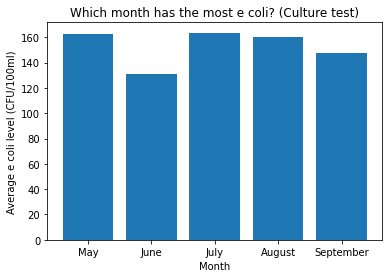

In [118]:
plt.bar(x_axis, culture_y_axis)


plt.title("Which month has the most e coli? (Culture test)")
plt.xlabel("Month")
plt.ylabel("Average e coli level (CFU/100ml)")

plt.show()

In [27]:
dna_by_date = dna_data.groupby("Sample Date")
culture_by_date = culture_data.groupby("Sample Date")

In [28]:
daily_dna_means = dna_by_date["DNA Reading Mean"].mean()
daily_culture_means = culture_by_date["Culture Reading Mean"].mean()

In [29]:
len(daily_dna_means)

433

In [30]:
dates = dna_data["Sample Date"].unique()

In [31]:
len(dates)

433

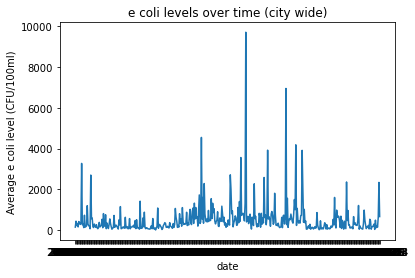

In [32]:
x_axis = dates
y_axis = daily_dna_means

plt.plot(x_axis, y_axis)


plt.title("e coli levels over time (city wide)")
plt.xlabel("date")
plt.ylabel("Average e coli level (CFU/100ml)")

plt.show()

In [33]:
daily_dna_means = daily_dna_means.to_frame()
daily_culture_means = daily_culture_means.to_frame()

In [34]:
daily_dna_means.reset_index(drop=False, inplace=True)
daily_culture_means.reset_index(drop=False, inplace=True)

In [35]:
daily_dna_means=daily_dna_means.rename(columns = {"Sample Date":"Date","DNA Reading Mean":"Citywide Mean E Coli Level"})

In [36]:
daily_culture_means.columns

Index(['Sample Date', 'Culture Reading Mean'], dtype='object')

In [37]:
daily_culture_means = daily_culture_means.rename(columns = {"Sample Date":"Date","Culture Reading Mean":"Citywide Mean E Coli Level"})

In [38]:
daily_dna_means.to_csv('DNA_daily_citywide_means.csv')
daily_culture_means.to_csv('culture_daily_citywide_means.csv')

In [39]:
##########

In [40]:
Milwaukee = pd.read_csv("Milwaukee_DNA_Rainfall.csv")

In [41]:
Milwaukee.head()

,Unnamed: 0,Date,Rainfall (In)
0,390,2015-05-26,0.0
1,274,2015-05-27,0.0
2,406,2015-05-28,0.0
3,200,2015-06-01,0.0
4,178,2015-06-02,0.0


In [92]:
Milwaukee["Rolling avg"] = Milwaukee.rolling(window=30, on="Date")["Rainfall (In)"].mean()

In [93]:
Milwaukee.head()

,Unnamed: 0,Date,Rainfall (In),Rolling avg
0,390,2015-05-26,0.0,NaN
1,274,2015-05-27,0.0,NaN
2,406,2015-05-28,0.0,NaN
3,200,2015-06-01,0.0,NaN
4,178,2015-06-02,0.0,NaN


In [94]:
comparison = daily_dna_means.merge(Milwaukee, how="left", on="Date")
comparison.head()

,Date,Citywide Mean E Coli Level,Unnamed: 0,Rainfall (In),Rolling avg
0,2015-05-26,147.8,390,0.0,NaN
1,2015-05-27,438.0,274,0.0,NaN
2,2015-05-28,223.4,406,0.0,NaN
3,2015-06-01,331.0,200,0.0,NaN
4,2015-06-02,157.8,178,0.0,NaN


In [95]:
for index, row in comparison.iterrows():

    date = row["Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    comparison.loc[index, "year"] = formatted.year

In [96]:
comparison = comparison.loc[comparison["year"]>=2018,:]

In [97]:
comparison.head()

,Date,Citywide Mean E Coli Level,Unnamed: 0,Rainfall (In),Rolling avg,year
226,2018-05-25,472.625000,209,0.0,0.003333,2018.0
227,2018-05-26,699.316667,225,0.0,0.003333,2018.0
228,2018-05-27,603.900000,272,0.0,0.003333,2018.0
229,2018-05-28,234.240000,215,0.1,0.006667,2018.0
230,2018-05-29,257.550000,263,0.0,0.006667,2018.0


In [98]:
mke_x = comparison["Citywide Mean E Coli Level"]
mke_y = comparison["Rolling avg"]

Text(5000, 0.06, 'y = -0.0x + 0.04')

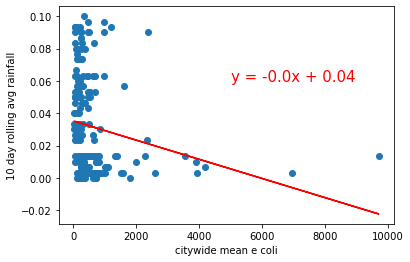

In [101]:
plt.scatter(mke_x, mke_y)
plt.ylabel("10 day rolling avg rainfall")
plt.xlabel("citywide mean e coli")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mke_x, mke_y)
regress_values = mke_x * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.plot(mke_x,regress_values,"r-")
plt.annotate(line_eq,(5000,.06),fontsize=15,color="red")

In [100]:
pvalue

0.003924441437092657

In [90]:
slope

-5.352179223281711e-06

In [51]:
daily_dna_means.head()

,Date,Citywide Mean E Coli Level,datetime
0,2015-05-26,147.8,2015-05-26
1,2015-05-27,438.0,2015-05-27
2,2015-05-28,223.4,2015-05-28
3,2015-06-01,331.0,2015-06-01
4,2015-06-02,157.8,2015-06-02


In [39]:
for index, row in daily_dna_means.iterrows():

    date = row["Date"]
    
    formatted = datetime.datetime.strptime(date, "%Y-%m-%d")
    
    daily_dna_means.loc[index, "datetime"] = formatted

In [49]:
 (daily_dna_means.loc[1,"datetime"] - daily_dna_means.loc[0,"datetime"]).days

1

In [50]:
today = daily_dna_means.loc[0,"datetime"]

daily_dna_means.loc[(daily_dna_means["datetime"] - today).days <=7,:]



AttributeError: 'Series' object has no attribute 'days'

In [ ]:
for index, row in daily_dna_means.iterrows():
    
    today = row["datetime"]
    
    week = [daily_dna_means.loc[(daily_dna_means["datetime"]-today).days <=7,:]]
    
    avg = week["Citywide Mean E Coli Level"].mean()
    
    daily_dna_means.loc[index, "rolling 7 day avg"] = avg